# ECMB paleomagnetic data analysis

This notebook analyzes paleomagnetic data developed from dikes of the East Central Minnesota batholith. These data were developed in the UC Berkeley Paleomagnetism lab by Nick Swanson-Hysell, Margaret Avery, Robert Sherwood and Yiming Zhang. Visualizations from this notebook used in manuscript figures are output to the visualizations subfolder.

This Jupyter notebook accompanies the paper:

Swanson-Hysell et al. 2021 **The paleogeography of Laurentia in its early years: new constraints from the Paleoproterozoic East Central Minnesota batholith**

In [2]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt

## Notes associated with fits to ECMB sites

| code | name | color |
|------|------|-------|
| lc   | low coercivity | yellowgreen |
| mc   | medium coercivity | steelblue |
| hc   | high coercivity | tomato |

- **NED1 (fits are done)** there are small lc components which given a direction roughly consistent with PLF, but they can not be well fit; the mc component is well-resolved; the sample move towards an MCR hc component, but it is small and cannot be fit
- **NED2 (fits are done)** very nicely resolved mc component with small lc component that is difficult to fit but is roughly consistent with PLF; hc component can be fit usually with a line anchored to the origin and corresponds to MCR direction.
- **NED3 (fits are done)** mc is aligned with lc and has a poorly grouped non-Fisherian distribution 
- **NED4 (fits are done)** small lc component aligned with PLF; mc is not particularly well-resolved in that the AF demag spectra is not as steep such that there is the possibility that the direction is being convolved with hc which is slightly worrisome as the direction is closer to the hc direction than is typical; some samples can be fit with hc if anchored to origin
- **NED5 (fits are done)** not very coherent lc direction (shallow and NW); steep ChRM (mc) direction; minimal hc direction that cannot be well fit.
- **NED6 (fits are done)** site lacks a distinct lc component; mc direction can be fit and often starts at rather low coercivity, but there can be issues with how well it is directionally resolved due to large hc component; large hc direction in Midcontinent Rift direction that can be well-fit in some samples, but is difficult to resolve as a line as it is moving towards endpoint rather than a resolved line that can be fit. As such some of the hc directions are endpoints anchored to the origin.
- **NED7 (fits are done)** there are large lc overprints on many of these samples that are north and slightly upwards; the large lc directions could potentially cause issues on the mc component, but they are overall well-resolved and tightly grouped; there is a minimal hc component and no fits could be made for it.
- **NED8 (fits are done)** lc component is typically small and can rarely be fit as it overlaps with the lower coercivity range of the mc component; the mc component dominants the remanence and can be isolated in the middle coercivity range as lines that are well-grouped; there is a high-coercivity phase that is also not well-isolated due to the mc component
- **NED9 (fits are done)** large lc component of varying magnitude and poorly group direction; nicely resolved mc component; small hc component that can rarely be fit as a line, but it consistent with MCR direction including movement toward that direction when it can't be fit with a line. NED9-1b is nicely behaved, but is a bit of an outlier in terms of position.
- **NED10 (fits are done)** small lc component; nicely resolved mc component prior to the specimens acquiring GRM with the exception of specimens 1b and 2b that are potentially biased by the large GRM (acqured vertically in specimen coordinates) and are not fit; no hc component can be resolved.
- **NED11 (fits are done)** lc component is present, but difficult to isolate given overlapping coercivity with the mc component; mc component is well-resolved in all specimens with the exception of specimen 1b; hc can be resolved in some of the speciments
- **NED12 (fits are done)** nicely resolved lc, mc and hc components that are fit for each specimen. specimens 1b and 4b had issues with orientation and are marked as bad.
- **NED13 (fits are done)** the mc component dominates with some samples with sizeable lc components with one sample with a full IRM (2b); a couple samples have resolvable hc
- **NED14 (fits are done)** large lc component that dominates the entire remanence in 1b and 2b; resolvable mc component between lc and hc in the rest of the specimens; hc component can be fit in a couple samples with others having it be obscured by acquisition of GRM
- **NED15 (fits are done)** well-grouped lc component to the SW and down resolvable below 4 millitesla; the mc component can be well fit prior to the specimens acquiring a GRM that obscures any hc
- **NED16 (fits are done)** sizeable lc component; mc component can be nicely resolvable in most specimens with the exception of a couple where it is obscured by a large GRM; GRM obscures hc component
- **NED17** baked contact test. 
- **NED18 (fits are done)** variable size lc components; mc can 
- **NED19 (fits are done)** a couple of the samples such as 8b are like the typical behavior, but majority have a large lmc component the is NE and up
- **NED20 (fits are done)** very large lc component that then goes to hc noisy endpoint without resolvable mc component
- **NED21 (fits are done)** same samples have very large lc component such that other components can not be fit while in some samples an mc component can be fit with a small hc endpoint that can be fit with a line anchored to the origin.
- **NED22 (fits are done)** specimens 3a to 5a look to have a lc and hc components in a similar direction that is interupted by a mc component. since the mc component is small relative to the other signal it can not be well isolated and this site does not have an usable overall mc mean.
- **NED23 (fits are done)** small lc in present-local field direction; nicely resolvable mc component; hc component that can be fit with an endpoint anchored to the origin
- **NED24** only two samples have been analyzed and these data are not fit in the current analysis
- **NED25 (fits are done)** specimens 1a, 2a, 6a, 7a, 8a have typical behavior with steep mc component that can be resolved, a distinct direction comes out of other samples in that coercivity change but persists more unidirectionally to into the hc. These are marked as bad with the subset with typical behavior being used; hc isn't well-resolved in the site although lc is roughly in the direction of hc (MCR)
- **NED26 (fits are done)** nicely resolvable lc, mc and hc components
- **NED27 (fits are done)** the samples dominantly only have two components — an lc and an hc. A couple samples have an mc component that influences the demagnetization, but it can only be fit in one sample
- **NED28 (fits are done)** very large lc component, followed by coherent mc component that can go to rather high coercivity
- **NED29 (fits are done)** small lc component in a well-grouped SW and shallow up (IRM?); resolvable mc component; heads toward hc component without that component being well-resolved, could be fit with planes, but is not currently.
- **NED30 (fits are done)** large lc components; mc components are not well-resolved there might be a hint of it in 8a, but it can't be fit; a couple samples with smaller lc components have a MCR hc direction
- **NED31 (fits are done)** large lc overprints on 1a and 2a; 3a, 4a and 5a have typical behavior with a nicely resolved mc component going to typical hc direction
- **NED32 (fits are done)** large lc components that are typically single-component (with some wiggling) up through the coercivity spectra
- **NED33 (fits are done)** the samples have lc and hc components without resolvable mc components. There is a hint of an mc component in 5a, 6a and 7a but it cannot be fit.
- **NED34 (fits are done)** small lc component that cannot be fit with a line; large mc component that dominants the remanence; moves towards a small hc that cannot be fit
- **NED35 (fits are done)** large mc component dominants remanance such that lc and hc are not resolved
- **NED36 (fits are done)** small lc in PLF direction; remanence is dominated by hc component headed towards origin

## Import sample-level data

In [3]:
specimen_data = pd.read_csv('../Data/pmag_data/specimens.txt', sep='\t',skiprows=1)
specimen_data.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
0,NED1-1b,NED1-1b_LP-DIR-AF,NED1-1,NaN,mc,159.7,62.5,1.0,5.0,-1.0,2.8,1.0,0.04,0.025,T,hargrave 2018-09-21 18:45:36,pmagpy-4.2.25: demag_gui,u,This study,LP-DIR-AF:DE-BFL:DA-DIR,g,NaN,NaN,ECMB,NED1
1,NED1-1b,NED1-1b_LP-DIR-AF,NED1-1,NaN,mc,139.2,74.1,1.0,5.0,0.0,2.8,1.0,0.04,0.025,T,hargrave 2018-09-21 18:45:36,pmagpy-4.2.25: demag_gui,u,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO,g,NaN,NaN,ECMB,NED1
2,NED1-1b,NaN,NED1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,LP-NOMAG,NaN,NaN,NaN,ECMB,NED1
3,NED1-2b,NED1-2b_LP-DIR-AF,NED1-2,NaN,mc,164.1,66.9,1.0,7.0,-1.0,3.4,0.4,0.04,0.020,T,hargrave 2018-09-21 19:30:31,pmagpy-4.2.25: demag_gui,u,This study,LP-DIR-AF:DE-BFL:DA-DIR,g,NaN,NaN,ECMB,NED1
4,NED1-2b,NED1-2b_LP-DIR-AF,NED1-2,NaN,mc,149.9,76.3,1.0,7.0,0.0,3.4,0.4,0.04,0.020,T,hargrave 2018-09-21 19:30:31,pmagpy-4.2.25: demag_gui,u,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO,g,NaN,NaN,ECMB,NED1


## Import site-level data

In [4]:
site_data = pd.read_csv('../Data/pmag_data/sites.txt', sep='\t',skiprows=1)
site_data.head(1)

,site,location,samples,specimens,age,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,height,lat,lon,geologic_classes,geologic_types,lithologies,software_packages,citations,method_codes,result_quality,result_type,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,NED1,ECMB,NED1-3:NED1-4:NED1-5:NED1-7:NED1-8,NED1-3b:NED1-4b:NED1-5b:NED1-7b:NED1-8b,1779,1782,1776,Ma,9.8,lc,46.4,70.0,62.0,5.0,5.0,5.0,0.0,n,4.9357,0.0,0.0,45.53423,265.75804,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,16.9,14.5,59.5,322.8


## Analyze NE-trending dike site-level data

We will not include NWD1 as it is another generation of dikes that cross cut the NED dikes.

We will apply a filter of $\alpha_{95}<8$. This filter removes NED3 which has streaked directions between mc and hc component means, NED21 which only has 2 mc component fits, NED17 which is the baked contact test site and includes a shifted block, and NED 19 as there are two populations of directions and an imprecise mean for the one that corresponds with the population.

In [5]:
NED_site_data = site_data.drop(site_data[site_data['site']=='NWD1'].index)
NED_site_data_mc = NED_site_data[NED_site_data['dir_comp_name']=='mc']
NED_site_data_mc = NED_site_data_mc[NED_site_data_mc['dir_alpha95']<8]
NED_site_data_mc

,site,location,samples,specimens,age,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,height,lat,lon,geologic_classes,geologic_types,lithologies,software_packages,citations,method_codes,result_quality,result_type,vgp_dm,vgp_dp,vgp_lat,vgp_lon
1,NED1,ECMB,NED1-1:NED1-2:NED1-3:NED1-4:NED1-5:NED1-6:NED1...,NED1-1b:NED1-2b:NED1-3b:NED1-4b:NED1-5b:NED1-6...,1779,1782,1776,Ma,2.8,mc,157.6,74.7,380.0,8.0,8.0,8.0,0.0,t,7.9816,0.0,0.0,45.53423,265.75804,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,5.1,4.6,18.4,276.9
3,NED10,ECMB,NED10-3:NED10-4:NED10-5:NED10-6:NED10-7:NED10-8,NED10-3b:NED10-4b:NED10-5b:NED10-6b:NED10-7b:N...,1779,1782,1776,Ma,3.7,mc,199.7,73.3,324.0,6.0,6.0,6.0,0.0,t,5.9846,0.0,0.0,45.53259,265.75742,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,6.6,5.9,15.8,255.4
6,NED11,ECMB,NED11-2:NED11-3:NED11-4:NED11-5:NED11-6:NED11-...,NED11-2b:NED11-3b:NED11-4b:NED11-5b:NED11-6b:N...,1779,1782,1776,Ma,3.1,mc,166.1,75.1,391.0,7.0,7.0,7.0,0.0,t,6.9847,0.0,0.0,45.53252,265.75768,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,5.7,5.2,18.1,272.6
8,NED12,ECMB,NED12-1:NED12-3:NED12-5:NED12-6:NED12-7:NED12-8,NED12-1b:NED12-3b:NED12-5b:NED12-6b:NED12-7b:N...,1779,1782,1776,Ma,3.5,mc,179.5,73.0,374.0,6.0,6.0,6.0,0.0,t,5.9866,0.0,0.0,45.53489,265.76076,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,6.2,5.6,14.1,266.0
11,NED13,ECMB,NED13-1:NED13-3:NED13-4:NED13-5:NED13-6:NED13-...,NED13-1b:NED13-3b:NED13-4b:NED13-5b:NED13-6b:N...,1779,1782,1776,Ma,4.3,mc,169.1,73.9,199.0,7.0,7.0,7.0,0.0,t,6.9698,0.0,0.0,45.53497,265.76113,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,7.8,7.0,15.9,271.4
13,NED14,ECMB,NED14-3:NED14-4:NED14-5:NED14-7:NED14-8:NED14-9,NED14-3b:NED14-4b:NED14-5b:NED14-7b:NED14-8b:N...,1779,1782,1776,Ma,4.6,mc,193.0,70.0,217.0,6.0,6.0,6.0,0.0,t,5.9769,0.0,0.0,45.53492,265.76119,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,7.9,6.8,10.1,258.0
15,NED15,ECMB,NED15-1:NED15-2:NED15-3:NED15-4:NED15-5:NED15-...,NED15-1b:NED15-2b:NED15-3b:NED15-4b:NED15-5b:N...,1779,1782,1776,Ma,2.3,mc,175.8,77.7,604.0,8.0,8.0,8.0,0.0,t,7.9884,0.0,0.0,45.53688,265.76758,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,4.3,4.0,22.0,267.6
17,NED16,ECMB,NED16-2:NED16-3:NED16-4:NED16-5:NED16-8,NED16-2b:NED16-3b:NED16-4b:NED16-5b:NED16-8b,1779,1782,1776,Ma,3.6,mc,185.1,78.6,449.0,5.0,5.0,5.0,0.0,t,4.9911,0.0,0.0,45.53728,265.76822,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,6.8,6.4,23.6,263.7
25,NED18,ECMB,NED18-1:NED18-2:NED18-3:NED18-4:NED18-5:NED18-6,NED18-1b:NED18-2b:NED18-3b:NED18-4b:NED18-5b:N...,1779,1782,1776,Ma,5.3,mc,134.7,81.7,159.0,6.0,6.0,6.0,0.0,t,5.9686,0.0,0.0,45.53124,265.76945,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,10.3,10.0,33.2,279.5
30,NED2,ECMB,NED2-1:NED2-2:NED2-3:NED2-4:NED2-5:NED2-6:NED2...,NED2-1b:NED2-2b:NED2-3b:NED2-4b:NED2-5b:NED2-6...,1779,1782,1776,Ma,2.7,mc,172.3,74.9,420.0,8.0,8.0,8.0,0.0,t,7.9833,0.0,0.0,45.53421,265.75816,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,4.9,4.5,17.4,269.6


### Export site mean latex table

In [6]:
columns=['site',
         'lat',
         'lon',
         'dir_n_samples',
         'dir_dec',
         'dir_inc',
         'dir_k',
         'dir_r',
         'dir_alpha95',
         'vgp_lat',
         'vgp_lon']

formatters=[None,
            "{:0.5f}".format,
            "{:0.5f}".format,
            "{:0.0f}".format,
            "{:0.1f}".format,
            "{:0.1f}".format,
            "{:0.0f}".format,
            "{:0.2f}".format,            
            "{:0.1f}".format,
            "{:0.1f}".format,
            "{:0.1f}".format]

#export at tens place for most columns
NED_site_data_mc.to_latex(columns=columns,index=False,formatters=formatters)

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n  site &      lat &       lon & dir\\_n\\_samples & dir\\_dec & dir\\_inc & dir\\_k & dir\\_r & dir\\_alpha95 & vgp\\_lat & vgp\\_lon \\\\\n\\midrule\n  NED1 & 45.53423 & 265.75804 &             8 &   157.6 &    74.7 &   380 &  7.98 &         2.8 &    18.4 &   276.9 \\\\\n NED10 & 45.53259 & 265.75742 &             6 &   199.7 &    73.3 &   324 &  5.98 &         3.7 &    15.8 &   255.4 \\\\\n NED11 & 45.53252 & 265.75768 &             7 &   166.1 &    75.1 &   391 &  6.98 &         3.1 &    18.1 &   272.6 \\\\\n NED12 & 45.53489 & 265.76076 &             6 &   179.5 &    73.0 &   374 &  5.99 &         3.5 &    14.1 &   266.0 \\\\\n NED13 & 45.53497 & 265.76113 &             7 &   169.1 &    73.9 &   199 &  6.97 &         4.3 &    15.9 &   271.4 \\\\\n NED14 & 45.53492 & 265.76119 &             6 &   193.0 &    70.0 &   217 &  5.98 &         4.6 &    10.1 &   258.0 \\\\\n NED15 & 45.53688 & 265.76758 &             8 &   175.8 &    77.7 &   604 

In [7]:
NWD_site_data = site_data[site_data['site']=='NWD1']
NWD_site_data_mc = NWD_site_data[NWD_site_data['dir_comp_name']=='mc']
NWD_site_data_mc

,site,location,samples,specimens,age,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,height,lat,lon,geologic_classes,geologic_types,lithologies,software_packages,citations,method_codes,result_quality,result_type,vgp_dm,vgp_dp,vgp_lat,vgp_lon
82,NWD1,ECMB,NWD1-11:NWD1-12:NWD1-13:NWD1-14:NWD1-15:NWD1-1...,NWD1-11b:NWD1-12b:NWD1-13a:NWD1-14a:NWD1-15a:N...,1095,1100,1090,Ma,6.4,mc,293.4,41.6,66.0,9.0,9.0,9.0,0.0,t,8.8792,0.0,0.0,45.53407,265.76852,Intrusive,Diabase,Diabase,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,7.8,4.8,32.9,177.5


In [8]:
NWD_site_data_mc.to_latex(columns=columns,index=False,formatters=formatters)

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n site &      lat &       lon & dir\\_n\\_samples & dir\\_dec & dir\\_inc & dir\\_k & dir\\_r & dir\\_alpha95 & vgp\\_lat & vgp\\_lon \\\\\n\\midrule\n NWD1 & 45.53407 & 265.76852 &             9 &   293.4 &    41.6 &    66 &  8.88 &         6.4 &    32.9 &   177.5 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Plot results and calculate mean pole

In [9]:
NED_site_data_mc_dec = NED_site_data_mc['dir_dec'].tolist()
NED_site_data_mc_inc = NED_site_data_mc['dir_inc'].tolist()
NED_site_data_mc_a95 = NED_site_data_mc['dir_alpha95'].tolist()

NED_site_data_mc_vgp_lat = NED_site_data_mc['vgp_lat'].tolist()
NED_site_data_mc_vgp_lon = NED_site_data_mc['vgp_lon'].tolist()

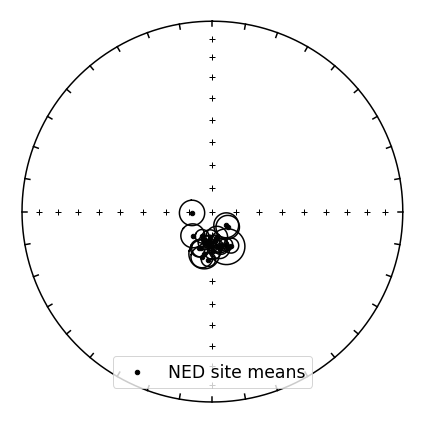

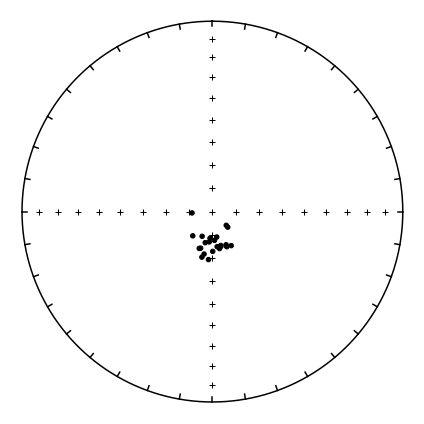

In [17]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for n in range(0,len(NED_site_data_mc_dec)):
    ipmag.plot_di_mean(NED_site_data_mc_dec[n],NED_site_data_mc_inc[n],NED_site_data_mc_a95[n],
                       color=[.01,.01,.01])
ipmag.plot_di(NED_site_data_mc_dec[0],NED_site_data_mc_inc[0],label='NED site means')
plt.legend(fontsize='xx-large',loc='lower center',bbox_to_anchor=(0.5,0.05))
plt.savefig('visualizations/mc_site_mean_directions.pdf')
plt.show()

plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(NED_site_data_mc_dec,NED_site_data_mc_inc)
plt.show()

In [10]:
NED_pole = ipmag.fisher_mean(NED_site_data_mc_vgp_lon,NED_site_data_mc_vgp_lat)
NED_pole

{'dec': 265.8158044859281,
 'inc': 20.48669733354535,
 'n': 23,
 'r': 22.51800539199423,
 'k': 45.64366412940581,
 'alpha95': 4.528967055678733,
 'csd': 11.989325978336389}

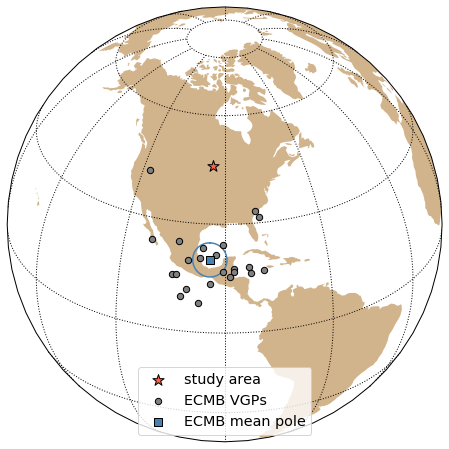

In [11]:
map_axis = ipmag.make_orthographic_map(central_longitude=270,central_latitude=30,
                                       land_edge_color=None)
ipmag.plot_vgp(map_axis,-94.2,45.5,color='tomato',marker='*',markersize=140,label='study area')
ipmag.plot_vgp(map_axis,NED_site_data_mc_vgp_lon,NED_site_data_mc_vgp_lat,
               color='grey',markersize=40,label='ECMB VGPs')
ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                marker='s',color='steelblue',markersize=50,label='ECMB mean pole')
plt.legend(fontsize='x-large',loc='lower center')
plt.savefig('visualizations/NED_pole.pdf')

### Test if VGP distribution is Fisherian

{'Mode': 'Mode 1',
 'Dec': 265.8884717903875,
 'Inc': 20.342047823434047,
 'N': 23,
 'Mu': -0.2923578974958298,
 'Mu_critical': 1.207,
 'Me': 0.48715288463815454,
 'Me_critical': 1.094,
 'Test_result': 'consistent with Fisherian model'}

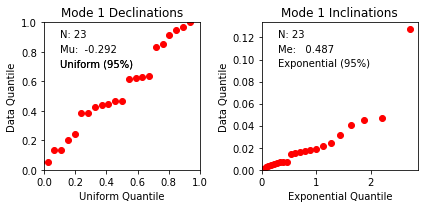

In [12]:
ipmag.fishqq(NED_site_data_mc_vgp_lon,NED_site_data_mc_vgp_lat)

In [13]:
duluth_lat = 46.8
duluth_lon = 267.9

ipmag.lat_from_pole(duluth_lon,duluth_lat,NED_pole['dec'],NED_pole['inc'])

63.63191909904516

## Plotting the direction of the NW-trending dike and NE-trending dike hc component

In [14]:
NWD_mc = site_data[(site_data['site']=='NWD1') & (site_data['dir_comp_name']=='mc')]

site_data_hc = site_data[site_data['dir_comp_name']=='hc']
site_data_hc = site_data_hc[site_data_hc['dir_alpha95']<30]
#site_data_hc = site_data_hc[site_data_hc['dir_n_specimens']>2]

site_data_hc_dec = site_data_hc['dir_dec'].tolist()
site_data_hc_inc = site_data_hc['dir_inc'].tolist()
site_data_hc_a95 = site_data_hc['dir_alpha95'].tolist()

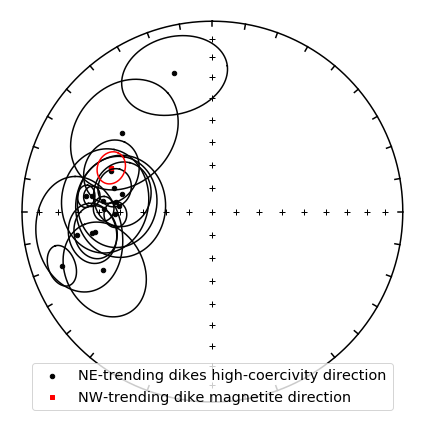

In [15]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for n in range(0,len(site_data_hc_dec)):
    ipmag.plot_di_mean(site_data_hc_dec[n],site_data_hc_inc[n],site_data_hc_a95[n],
                       color=[.01,.01,.01])
    
ipmag.plot_di(NWD_mc['dir_dec'].tolist()[0],NWD_mc['dir_inc'].tolist()[0],
              label='NE-trending dikes high-coercivity direction',color='black')

ipmag.plot_di_mean(NWD_mc['dir_dec'].tolist()[0],NWD_mc['dir_inc'].tolist()[0],
                   NWD_mc['dir_alpha95'].tolist()[0],color='red')
ipmag.plot_di(NWD_mc['dir_dec'].tolist()[0],NWD_mc['dir_inc'].tolist()[0],
              label='NW-trending dike magnetite direction',color='red',marker='s')
plt.legend(fontsize='x-large',loc='lower center')
plt.savefig('visualizations/hc_site_mean_directions.pdf')
plt.show()

## Compare with Cleaver dike pole VGPs

In [16]:
Cleaver_sites = pd.read_csv('../Data/pole_compilations/Irving2004_Cleaver.csv')
Cleaver_sites = Cleaver_sites[(Cleaver_sites.site != 27) & (Cleaver_sites.site != 24) & (Cleaver_sites.site != 32) & (Cleaver_sites.site != 33) & (Cleaver_sites.site != 35) & (Cleaver_sites.site != 36) & (Cleaver_sites.site != 45)]

The following sites are not included in Irving et al. 2004 Cleaver Dike pole:

- Site 24 is volcanic breccia
- Site 32 is a baked tuff at contact of dyke 22. 
- Site 33 is a tuff at distance of 25m from dyke 22. 
- Site 35 baked andesite at contact of dyke 34. 
- Site 36 andesite 50m from dyke 34. 
- Site 45 Gunbarrel Gabbro.
- Site 27 is not described as being excluded, but it is excluded as there are only 17 dikes in the mean and was it is removed the Fisher mean is the same as reported in the Irving et al. 2004 paper. It is likely excluded due to an a_95 of 10

In [17]:
ipmag.fisher_mean(Cleaver_sites.dec_is.tolist(),Cleaver_sites.inc_is.tolist())

{'dec': 136.51006679590233,
 'inc': 57.38229461486087,
 'n': 17,
 'r': 16.751406437475655,
 'k': 64.36208499338396,
 'alpha95': 4.480276059885312,
 'csd': 10.096479472204122}

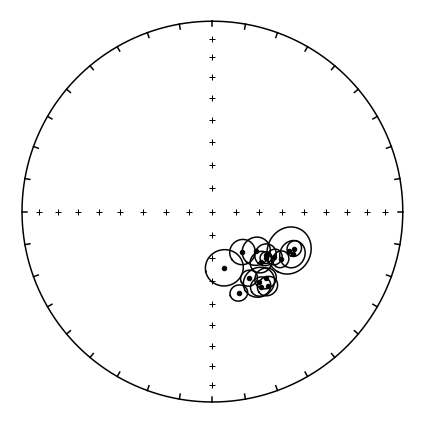

In [18]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in Cleaver_sites.index:
    ipmag.plot_di_mean(Cleaver_sites.dec_is[i],Cleaver_sites.inc_is[i],Cleaver_sites.alpha_95[i],
                       color=[.01,.01,.01])
plt.show()

In [19]:
ipmag.vgp_calc(Cleaver_sites,tilt_correction='no')

,site,site_lat,site_lon,n_samples,n_specimens,NRM,dec_is,inc_is,k,alpha_95,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,5,65.72,-118.13,6,12,2.00,132.1,64.6,53,6.0,46.478746,28.108473,277.268641,-28.108473,97.268641
1,6,65.72,-118.08,5,10,0.07,168.0,65.3,39,7.9,47.389134,23.488634,250.748458,-23.488634,70.748458
2,8,65.70,-118.13,6,11,13.10,147.2,51.3,117,4.2,31.968370,10.900148,269.774324,-10.900148,89.774324
3,9,65.68,-118.15,6,12,6.45,143.5,49.7,107,4.2,30.522741,10.231827,273.227679,-10.231827,93.227679
4,10,65.63,-117.88,6,12,2.91,143.4,68.4,67,5.4,51.625846,30.562254,267.577961,-30.562254,87.577961
5,15,65.62,-118.02,6,12,3.51,126.2,56.8,177,3.3,37.382725,21.055888,285.379818,-21.055888,105.379818
6,18,65.79,-118.08,6,10,2.51,141.5,53.0,118,4.5,33.565165,13.699967,274.189682,-13.699967,94.189682
7,19,65.79,-118.07,6,8,0.35,116.9,52.6,33,9.7,33.183597,20.115103,294.570797,-20.115103,114.570797
8,21,65.70,-118.07,6,12,1.89,162.0,52.9,143,3.6,33.469429,10.145916,257.111104,-10.145916,77.111104
9,22,65.70,-118.07,6,12,3.12,136.1,59.8,90,4.6,40.665414,21.653399,276.394696,-21.653399,96.394696


In [20]:
Cleaver_pole = ipmag.fisher_mean(Cleaver_sites['vgp_lon'].tolist(),Cleaver_sites['vgp_lat'].tolist())
Cleaver_pole

{'dec': 276.6268816988298,
 'inc': 19.364479939581486,
 'n': 17,
 'r': 16.550437496311094,
 'k': 35.59015680514113,
 'alpha95': 6.062723373024966,
 'csd': 13.577508024999728}

In [21]:
pmag.angle([Cleaver_pole['dec'],Cleaver_pole['inc']],[NED_pole['dec'],NED_pole['inc']])

array([10.22367729])

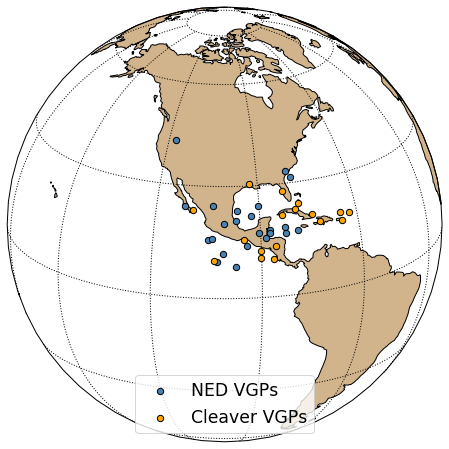

In [22]:
map_axis = ipmag.make_orthographic_map(central_longitude=260,central_latitude=20)
ipmag.plot_vgp(map_axis,NED_site_data_mc_vgp_lon,NED_site_data_mc_vgp_lat,
               color='steelblue',markersize=40,label='NED VGPs')
ipmag.plot_vgp(map_axis,Cleaver_sites['vgp_lon'],Cleaver_sites['vgp_lat'],
               color='orange',markersize=40,label='Cleaver VGPs')
plt.legend(fontsize='xx-large',loc='lower center')
plt.show()

Results of Watson V test: 

Watson's V:           11.9
Critical value of V:  6.3
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 10.2
Critical angle for M&M1990:   7.5



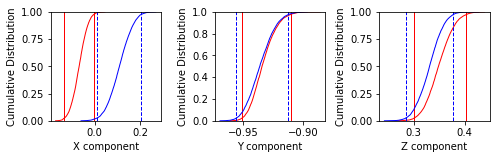

In [23]:
NED_VGPs = ipmag.make_di_block(NED_site_data_mc_vgp_lon,NED_site_data_mc_vgp_lat)
Cleaver_VGPs = ipmag.make_di_block(Cleaver_sites['vgp_lon'].tolist(),Cleaver_sites['vgp_lat'].tolist())

ipmag.common_mean_watson(NED_VGPs,Cleaver_VGPs)
ipmag.common_mean_bootstrap(NED_VGPs,Cleaver_VGPs)

In [24]:
ipmag.upload_magic(dir_path='../data/pmag_data/')

-I- Removing old error files from /Users/Laurentia/0000_Github/2021_ECMB/data/pmag_data: locations_errors.txt, samples_errors.txt, specimens_errors.txt, sites_errors.txt, ages_errors.txt, measurements_errors.txt, criteria_errors.txt, contribution_errors.txt, images_errors.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org
-W- Column 'core_depth' isn't in samples table, skipping it
-W- Column 'composite_depth' isn't in samples table, skipping it
-W- Invalid or missing column names, could not propagate columns
-I- locations file successfully read in
-I- Validating locations
-I- No row errors found!
-I- appending locations data to /Users/Laurentia/0000_Github/2021_ECMB/data/pmag_data/upload.txt
-I- 1 records written to locations file
-I- locations written to  /Users/Laurentia/0000_Github/2021_ECMB/data/pmag_data/upload.txt
-I- measurements file successfully read in
-I- Validating measurements
-W- these

(False,
 'Validation of your upload file has failed.\nYou can still upload /Users/Laurentia/0000_Github/2021_ECMB/data/pmag_data/ECMB_15.Jan.2021_2.txt to MagIC,\nbut you will need to fix the above errors before your contribution can be activated.',
 ['measurements'],
 {'measurements': {'rows':                     num                           value_pass_specimen_isIn  \
   measurement name                                                             
   None              12410  This value: "unknown" is not found in: specime...   
   None              12411  This value: "unknown" is not found in: specime...   
   
                                                                issues  
   measurement name                                                     
   None              {'value_pass_specimen_isIn': 'This value: "unk...  
   None              {'value_pass_specimen_isIn': 'This value: "unk...  ,
   'missing_columns': [],
   'missing_groups': Index([], dtype='object')}})